# Pseudo-tested methods in real life projects

This notebook shows the results of finding pseudo-tested methods in a set of real life Java projects.

First we import all the dependencies.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from tables import IPythonTableBuilder
from projects import Project
from pseudo_tested_methods import Record, show_rates_table, method_category_score, method_score_distributions

Then, we load the data obtained after executing the analysis of Gregor and Descartes.

In [2]:
records = [Record(project) for project in Project.available_projects()]

The following table shows, for each project, the number of methods that can be found in their compiled code.
The **Under Analysis** row, shows the number of methods in the project that are targeted by Descartes when looking for pseudo-tested methods. This set of methods exludes any compiler generated methods, constructors, static initializers, deprecated methods, simple getter, simple setters and methods returning only a constant. **Pseudo-tested** shows the number of such methods found for each project and **Ratio** shows the ratio of **Pseudo-tested** to **Under Analysis**.
It is interesting to notice that all projects contained pseudo-tested methods.

In [3]:
show_rates_table(records, build_table=IPythonTableBuilder)

Project,Methods,Under Analysis,Pseudo-tested,Ratio
AuthZForce PDP Core,1080,291,13,4%
Amazon Web Services SDK,209672,1800,224,12%
Apache Commons CLI,276,141,2,1%
Apache Commons Codec,677,426,12,3%
Apache Commons Collections,3439,1232,40,3%
Apache Commons IO,1118,641,29,5%
Apache Commons Lang,2736,1889,47,2%
Apache Flink,5100,1814,100,6%
Google Gson,816,477,10,2%
Jaxen XPath Engine,1199,569,11,2%


Given their nature, pseudo-tested methods seem to be the worst tested methods in the codebase. To guantify this fact we turn to traditional mutation testing and compute a mutation score for the set of traditional mutants planted in pseudo-tested methods and the do the same for required methods. The results are shown in the following plot. The sets of pseudo-tested methods had always lower scores.

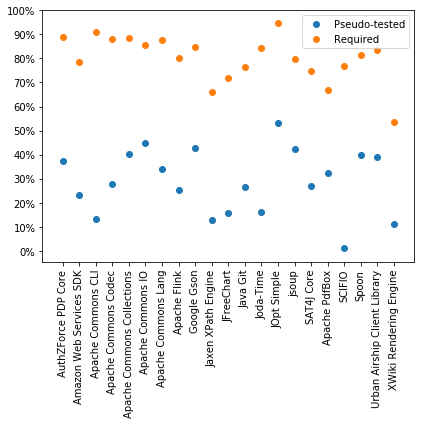

In [4]:
method_category_score(records)

To get a deeper characterization, we now compute a mutation score for every method under analysis. That is, we compute the ratio of mutants that were detected to all the mutants created, but for every method. Then we group the scores of pseudo-tested and required methods and show both value distributions in the following violin plot. Notice how the distribution of pseudo-tested methods tend to be skewed to lower values and the contray occurs for required methods. However, there are pseudo-tested methods with high mutation scores. This means that, still, a traditional mutant could be detected inside a pseudo-tested method.

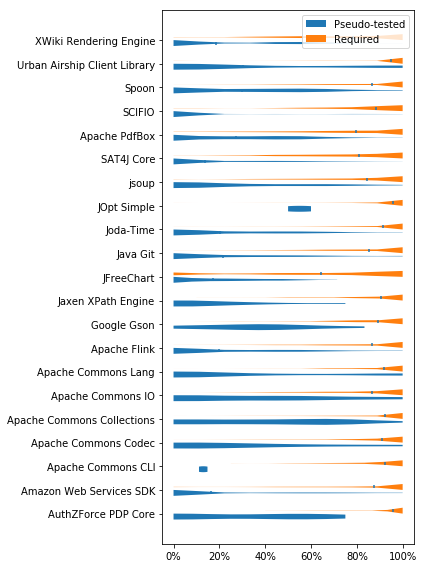

In [5]:
method_score_distributions(records)